# Исследование объявлений о продаже квартир

В данном исслдовании изучалась база данных Яндекс.Недвижимости по городу и окрестностям Санкт-Петербурга. В процессе работы были поставлены следующие задачи:
- изучить предоставленную базу данных
- исследовать различные распределения группирований квартир (например по площади квартиры или по цене)
- оценить продолжительность продажи квартир
- зависимость цены от различных факторов (площадь квартиры, этаж, дата размещения)
- найти самые дорогие города по стоимости квадрата жилья
- оценить зависимость стоимости квартиры от расстояния от центра Санкт-Петербурга (для городов в Петербурге)

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10) #вывод первых 10 строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

'first_day_expansion' имеет тип object, в последствии переведем в формат даты

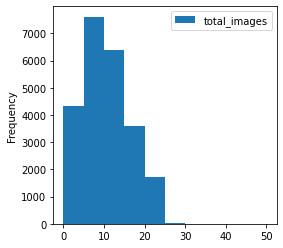

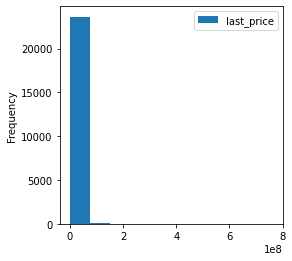

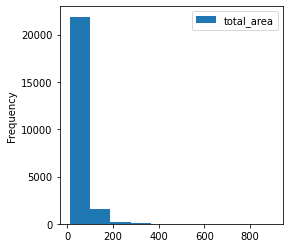

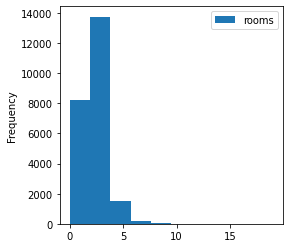

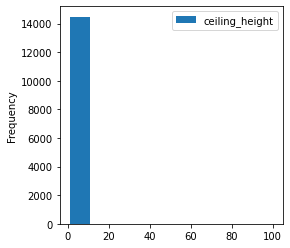

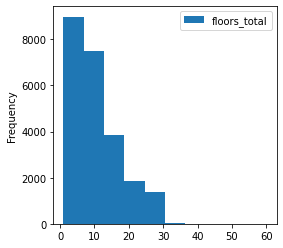

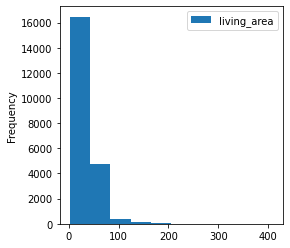

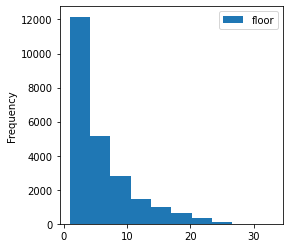

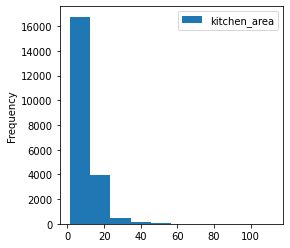

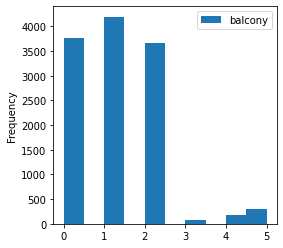

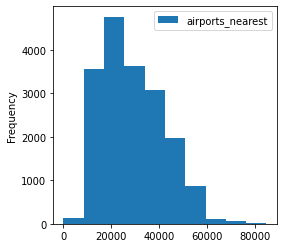

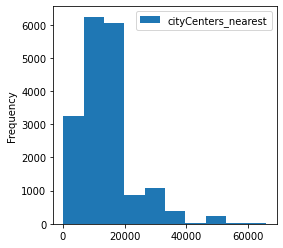

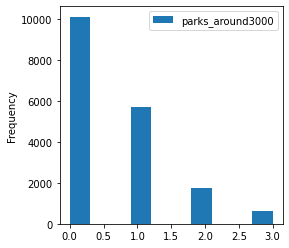

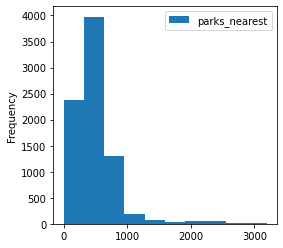

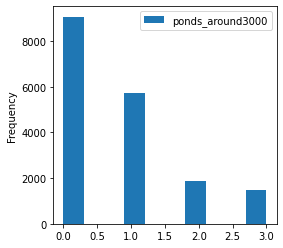

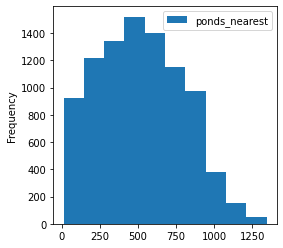

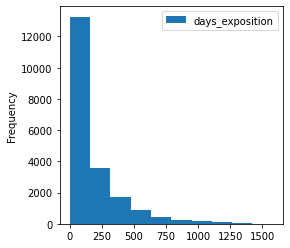

In [4]:
#Построим гистограммы для всех числовых столбцов таблицы на одном графике
for column in data.columns:
    if (data[column].dtype == np.int64 or data[column].dtype == np.float64):
        data.plot(y = column, kind='hist', figsize=(4,4))
# Сейчас представлены гистограммы для каждого числового столбца

По гистограммам видно, что есть аномально большие значения в колонках last_price, total_area, rooms, ceiling_height, living_area, kitchen_area.
По info() можно увидеть, что всего 23699 строк, колонки last_price, floors_total, is_apartment, balcony, days_exposition, first_day_exposition имеют неверные типы данных

### Предобработка данных

#### Найдите и изучите пропущенные значения в столбцах:

In [5]:
# Укажем количество пропусков в каждом столбце
print(data.isna().sum())
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


Можно заметить, что огромное число пропусков по техническим причинам, также многие люди пропустили пункты is_apartment, ceiling_height и balcony, все эти пункты можно заполнить

In [6]:
# изменим название cityCenters_nearest на city_centers_nearest
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Всего в датафрейме 22 столбца, 23699 строк. Отсутствуют данные в строках:
- ceiling_height (высота потолков, заменить строки сожно <font color = 'green'>медианным значением</font>, <font color = 'blue'>причиной пропуска является неосведомленность продавцов об этом параметре)</font>
- floors_total (количество этажей, заполнить пропуски не получится, можно удалить эти значения из-за их малого количества, <font color = 'blue'>причина - продавцы не заполнили данный пункт</font>)
- living_area (жилая площадь, заполнить пропуски не получится, т.к. нет возможности учесть площадь санузлов, балконов и т.д., <font color = 'blue'>причиной является неосведомленность продавцов об площади</font>)
- is_apartment (является ли жилье апартаментами, скорее всего такие помещения являются полноценными квартирами, <font color = 'green'>заполнить нулями</font>, <font color = 'blue'>причиной является игнорирование данного пункта</font>)
- kitchen_area (площадь кухни, заполнить пропуски не получится, <font color = 'blue'>причиной пропуска является неосведомленность об площади кухни</font>)
- balcony (наличие балкона, <font color = 'green'>заполнить нулями</font>, <font color = 'blue'>люди игнорировали этот пункт, т.к. не хотели показывать, что нет такого удобства</font>)
- locality_name (место населенного пункта, исходя из списка населенных пунктов заполнить не получится, <font color = 'blue'>причина пропуска - техническая ошибка</font>)
- airports_nearest (расстояние до аэропорта, заполнить пропуск не получится, <font color = 'blue'>причина - техническая ошибка</font>)
- city_centers_nearest (расстояние до центра города, заполнить пропуск не получится, <font color = 'blue'>причина - техническая ошибка</font>)
- parks_around3000 (парки в радиусе 3 км, заполнить пропуск не получится, <font color = 'blue'>причина - техническая ошибка</font>)
- parks_nearest (расстояние до ближайшего парка, заполнить пропуск не получится, <font color = 'blue'>причина - техническая ошибка</font>)
- ponds_around3000 (пруд в радиусе 3 км, заполнить пропуск не получится, <font color = 'blue'>причина - техническая ошибка</font>)
- ponds_nearest (ближайший пруд, заполнить пропуск не получится, <font color = 'blue'>причина - техническая ошибка</font>)
- days_exposition (сколько дней простояло объявление, заполнить не получится, <font color = 'blue'>причиной пропуска является, скорее всего, что на момент создания БД эти помещения не продались</font>)

In [7]:
# заполним пропуски в столбце balcony, если не заполнено, значит балкона нет
data['balcony'] = data['balcony'].fillna(0)
# проверим
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# сделаем тоже самое с апартаментами
data['is_apartment'] = data['is_apartment'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
# заменим nan в высоте потолков на медианное значение
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Рассмотрите типы данных в каждом столбце:

- Найдите столбцы, в которых нужно изменить тип данных.
- Преобразуйте тип данных в выбранных столбцах.

In [10]:
# рассмотрим еще раз информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- В столбце first_day_exposition поменять тип на datetime
- В floors_total поменять на int, т.к. количество этажей целое (однако это невозможно сделать с пропусками, поэтому удалить их)
- В is_apartment поменять на bool
- В balcony изменить на int, т.к. количество целое

In [11]:
# поменяем формат в столбце first_day_exposition, is_apartment, balcony и проверим
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype(bool)
data['balcony'] = data['balcony'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [12]:
#Удалим строчки с пропусками в столбцах floors_total и locality_name
data = data.dropna(subset=['floors_total'])
data = data.dropna(subset = ['locality_name']).reset_index(drop = True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [13]:
data['floors_total'] = data['floors_total'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

#### Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

In [14]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [15]:
len(data['locality_name'].unique())

364

In [16]:
# Заменим неявные дубликаты, заменив буквы ё на е, также различные поселки объеденив в один тип, переведя некоммерческое
# товарищество в простое
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа ', 'городской поселок ', 'коттеджный поселок '], 'поселок ', regex=True)
    .replace('поселок при железнодорожной', 'поселок', regex=True)
    .replace('садоводческое некоммерческое товарищество', 'садовое товарищество', regex=True)
) 
len(data['locality_name'].unique())

319

In [17]:
# после преобразования данных уберем явные дубликаты
print(len(data))
data = data.drop_duplicates()
print(len(data))

23565
23565


Явных дубликатов не оказалось

Итого было сокращено более 45 наименований дубликатов

Резюмируем проделанную работу: 
- в строках ceiling_height, balcony, is_apartment заполнены пропуски
- в некоторых столбцах изменен тип данных
- были убраны неявные дубликаты наименований населеных пунктов
- было обнаружено, что явных дубликатов не было

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавьте в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [18]:
# получим столбец price_square
data['price_square'] = round(data['last_price']/data['total_area'], 2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


In [19]:
# получим столбец day_of_week с днями недели
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,day_of_week
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1


In [20]:
# получим month_number с номером месяца публикации и month_publication с названиями месяцев
data['number_month'] = data['first_day_exposition'].dt.month
data['month_publication'] = data['first_day_exposition'].dt.month_name()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,day_of_week,number_month,month_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,March
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,December
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,August
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,July
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,June


In [21]:
# получим столбец year_publication
data['year_publication'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,day_of_week,number_month,month_publication,year_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,March,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,December,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,August,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,July,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,June,2018


In [22]:
# создадим колонку для типа этажа квартиры floor_type
# создадим функцию для перевода типа этажа
    
def categoryze_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другие'

data['floor_type'] = data.apply(categoryze_floor, axis=1)    
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,day_of_week,number_month,month_publication,year_publication,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,March,2019,другие
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,December,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,August,2015,другие
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,July,2015,другие
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,June,2018,другие


In [23]:
# создадим колонку с расстоянием до центра города в км и округлим
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000)
data['city_centers_nearest_km'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: city_centers_nearest_km, dtype: float64

Итого добавлены 6 новых колонок: цена за квадратный метр, день недели, месяц и год постановки на продажу, тип этажа, расстояние до центра в км

### Проведите исследовательский анализ данных

#### Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалите их. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах, если они есть. Если природа аномалии понятна и данные действительно искажены, то восстановите    корректное значение. В противном случае удалите редкие и выбивающиеся значения.
Список параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

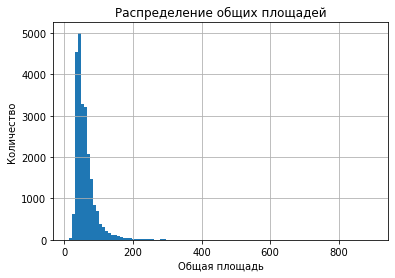

In [24]:
# построим гистограмму для общей площади

fig, ax = plt.subplots()
ax.hist(data['total_area'], bins=100)
ax.set_xlabel('Общая площадь')
ax.set_ylabel('Количество')
ax.grid(True)
ax.set_title('Распределение общих площадей')
data['total_area'].describe()

Видно, что крайне мало квартир с площадью более 200 метров, также с маленькими квартирами стоит более детально изучить рынок, возьмем примерную границу 25 метров

In [25]:
data_more_200 = data.query('total_area > 200')
print(data_more_200['total_area'].value_counts())
print(len(data_more_200))

data_less_25 = data.query('total_area < 25')
print(data_less_25['total_area'].value_counts())
print(len(data_less_25))

230.0    6
211.0    5
222.0    5
214.0    5
235.0    5
        ..
254.0    1
210.3    1
283.0    1
590.0    1
259.6    1
Name: total_area, Length: 156, dtype: int64
226
24.00    27
23.00    19
22.00    16
20.00     8
18.00     5
         ..
21.60     1
21.10     1
24.75     1
23.06     1
14.00     1
Name: total_area, Length: 71, dtype: int64
186


Есть отдельные квартиры, с очень большими площадями, что похоже на правду, однако их мало. Со стороны малых квартир видно, что есть достаточно квартир с площадью 22 метра и более, поэтому ограничим данные по площади с 22 до 200 метров 

count    23279.000000
mean        58.251977
std         26.471442
min         22.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        200.000000
Name: total_area, dtype: float64

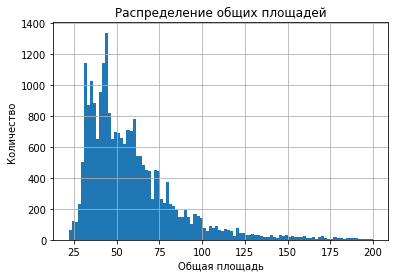

In [26]:
data = data.query('(total_area >= 22) & (total_area <= 200)')
#data['total_area'].plot(kind='hist', bins=100, figsize=(8,6), range=(0,200), 
#                        title='Распределение жилых площадей').set_xlabel('Жилая площадь')
fig, ax = plt.subplots()
ax.hist(data['total_area'], bins=100)
ax.set_xlabel('Общая площадь')
ax.set_ylabel('Количество')
ax.grid(True)
ax.set_title('Распределение общих площадей')
data['total_area'].describe()

Итого имеем, что график имеет вид близкий к Пуасоновскому, однако есть провал в районе 40 квадратных метров. Большинство квртир имеют площадь от 30 до 65 метров, что похоже на правду.

count    21456.000000
mean        33.289897
std         17.363147
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

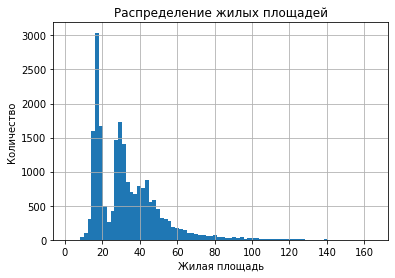

In [27]:
# построим гистограмму для жилой площади
#data['living_area'].hist(bins=80, figsize=(8,6))
fig, ax = plt.subplots()
ax.hist(data['living_area'], bins=80)
ax.set_xlabel('Жилая площадь')
ax.set_ylabel('Количество')
ax.grid(True)
ax.set_title('Распределение жилых площадей')
data['living_area'].describe()

Если сравнивать с гистограммой по общей площади, то видно, что здесь колокол смещен ближе к нулю, что верно, также максимальные значения меньше, чем на предыдущей гистограмме, что тоже верно логически. Также можно отметить наличие локального минимума в 25 метрах, соответствующий так раз примерно 40 метрам в общей площади.

count    21133.000000
mean        10.380725
std          5.363373
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max         93.200000
Name: kitchen_area, dtype: float64

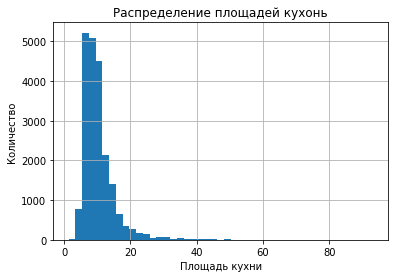

In [28]:
# построим гистограмму для площади кухни
#data['kitchen_area'].hist(bins=45, figsize=(8, 6))
fig, ax = plt.subplots()
ax.hist(data['kitchen_area'], bins=45)
ax.set_xlabel('Площадь кухни')
ax.set_ylabel('Количество')
ax.grid(True)
ax.set_title('Распределение площадей кухонь')
data['kitchen_area'].describe()

Колокол в данной гистограмме сильно уже чем в предыдущих графиках, связано с тем, что неважно какая площадь у стандартной квартиры, кухня примерно одинаковая (т.е. что в квартре 35 квадратов, что в квартире 55) 

count    2.327900e+04
mean     6.033503e+06
std      6.251800e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

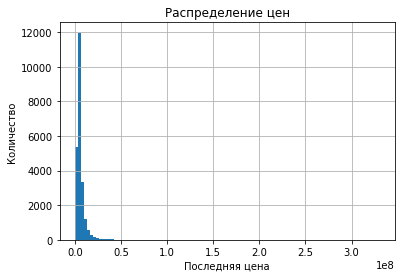

In [29]:
# гистограмма для конечной цены
#data['last_price'].hist(bins=100, figsize=(8, 6))
fig, ax = plt.subplots()
ax.hist(data['last_price'], bins=100)
ax.set_xlabel('Последняя цена')
ax.set_ylabel('Количество')
ax.grid(True)
ax.set_title('Распределение цен')
data['last_price'].describe()

Есть квартиры, которые стоят на 2 порядка больше других, это явно выброс, посмотрим сколько больше 30 млн (3е7)

count    1.840000e+02
mean     5.001811e+07
std      3.297830e+07
min      3.005000e+07
25%      3.500000e+07
50%      4.000000e+07
75%      5.225000e+07
max      3.300000e+08
Name: last_price, dtype: float64

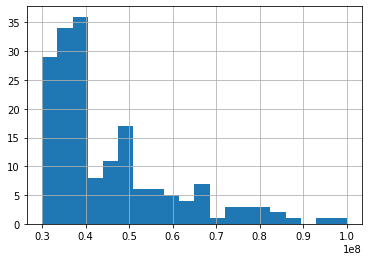

In [30]:
data_more_30 = data.query('last_price > 3e7')
data_more_30['last_price'].hist(bins=20, range=(3e7, 1e8))
data_more_30['last_price'].describe()

Ограничимся 40 млн

count    2.318500e+04
mean     5.797346e+06
std      4.308388e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      3.999000e+07
Name: last_price, dtype: float64

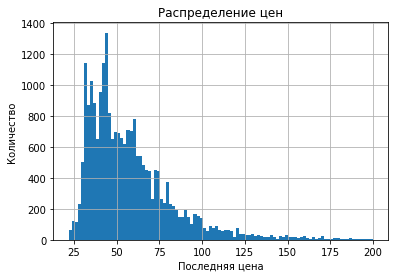

In [31]:
data = data.query('last_price < 40e6')
#data['last_price'].hist(bins=100, figsize=(8, 6))
fig, ax = plt.subplots()
ax.hist(data['total_area'], bins=100)
ax.set_xlabel('Последняя цена')
ax.set_ylabel('Количество')
ax.grid(True)
ax.set_title('Распределение цен')
data['last_price'].describe()

Получаем, что медианная цена за квартиру составляет 4.6 млн рублей, также подавляющее большинство квартир стоит до 7 млн рублей (3 квартиль)

Теперь рассмотрим количество комнат

count    23185.000000
mean         2.032435
std          0.990936
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

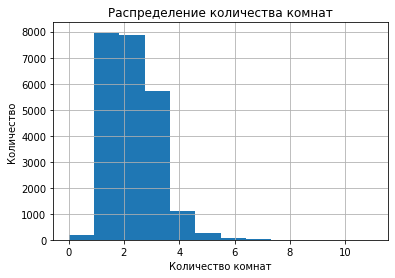

In [32]:
#data['rooms'].hist(bins=12)
fig, ax = plt.subplots()
ax.hist(data['rooms'], bins=12)
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Количество')
ax.grid(True)
ax.set_title('Распределение количества комнат')
data['rooms'].describe()

Есть странные значения с количеством комнат 0, проверим являются ли они студиями

In [33]:
print(len(data[(data['rooms'] == 0) & (data['studio'] == True)]))
print(len(data[(data['rooms'] == 0)]))

122
177


In [34]:
# недвижимость не может быть без комнат, большинство из них это студии, заменим 0 на 1
data['rooms'] = data['rooms'].replace(0, 1)

count    23185.000000
mean         2.040069
std          0.979028
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

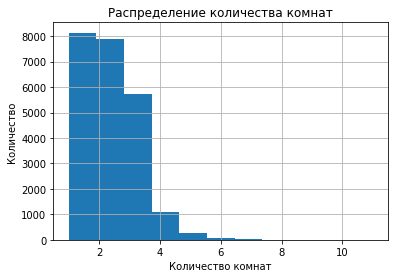

In [35]:
# проверим
#data['rooms'].hist(bins=11)
fig, ax = plt.subplots()
ax.hist(data['rooms'], bins=11)
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Количество')
ax.grid(True)
ax.set_title('Распределение количества комнат')
data['rooms'].describe()

In [36]:
rooms_3 = len(data.query('rooms <= 3'))
all_rooms = len(data)
print(rooms_3/all_rooms)

0.9376320897131766


93,7% квартир это квартиры с менее чем 4 комнатами. Доля 1- и 2- комнатных квартир примерно одинакова, чуть меньше у 3-комнатных.

Перейдем к высоте потолков

count    23185.000000
mean         2.719103
std          0.995915
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

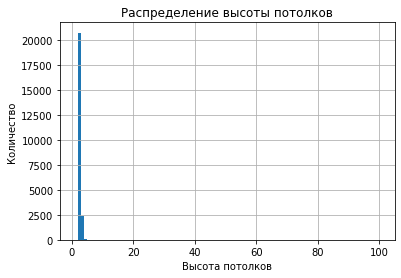

In [37]:
# высота потолков
#data['ceiling_height'].hist(bins=100)
fig, ax = plt.subplots()
ax.hist(data['ceiling_height'], bins=100)
ax.set_xlabel('Высота потолков')
ax.set_ylabel('Количество')
ax.grid(True)
ax.set_title('Распределение высоты потолков')
data['ceiling_height'].describe()

Здесь явно есть выбросы, посмотрим какие вообще значения

In [38]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Значения больше 10 метров заменим на поделенные на 10 (25 -> 2.5), затем посмотрим сколько с потолками больше 4 метров и меньше 2.5

In [39]:
# Проведем замену
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if (x>=10 and x <35) else (x/100 if x > 35 else x))
data['ceiling_height'].sort_values().unique()

array([1.  , 1.03, 1.2 , 1.4 , 1.75, 2.  , 2.2 , 2.25, 2.26, 2.3 , 2.34,
       2.4 , 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54,
       2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65,
       2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76,
       2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87,
       2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98,
       2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09,
       3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21,
       3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32,
       3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.43, 3.44,
       3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51, 3.52, 3.53, 3.54, 3.55,
       3.56, 3.57, 3.58, 3.59, 3.6 , 3.62, 3.63, 3.65, 3.66, 3.67, 3.68,
       3.7 , 3.75, 3.78, 3.8 , 3.83, 3.84, 3.85, 3.88, 3.9 , 3.93, 3.95,
       3.98, 4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.

Есть квартиры с явно очень высокими потолками, они не явяются типичными и явно выбиваются. Посмотрим сколько больше 3.5 метров имеют. Аналогично с низкими потолками, посмотрим сколько ниже 2.6

In [40]:
data_more_35 = data.query('ceiling_height > 3.5')
print(data_more_35['ceiling_height'].value_counts())
print(len(data_more_35))

data_less_26 = data.query('ceiling_height < 2.6')
print(data_less_26['ceiling_height'].value_counts())
print(len(data_less_26))

3.60    33
4.00    30
3.70    26
3.80    19
3.55    14
3.90     9
4.20     9
3.75     7
3.95     7
4.50     6
3.54     5
3.65     4
3.56     4
3.52     3
8.00     3
3.63     3
3.78     3
3.67     3
3.66     2
4.10     2
3.53     2
3.62     2
4.19     2
3.88     1
4.06     1
3.83     1
8.30     1
3.85     1
4.14     1
5.00     1
4.37     1
5.50     1
3.93     1
3.68     1
3.84     1
4.25     1
3.59     1
5.30     1
3.58     1
3.98     1
3.57     1
4.70     1
4.15     1
4.40     1
4.80     1
5.80     1
3.51     1
4.30     1
Name: ceiling_height, dtype: int64
223
2.50    3514
2.55     979
2.56     139
2.57     102
2.54      83
2.52      78
2.53      67
2.58      63
2.51      34
2.40      24
2.45      15
2.59      14
2.00      12
2.48       8
2.30       4
2.47       3
2.46       2
1.00       2
1.03       1
2.49       1
2.20       1
2.25       1
1.20       1
2.26       1
1.75       1
2.34       1
1.40       1
Name: ceiling_height, dtype: int64
5152


Квартир с потолками выше 4 и ниже 2.5 метров практически нет, поэтому выбросим эти данные

In [41]:
data = data.query('ceiling_height >= 2.5 & ceiling_height <=4')
data['ceiling_height'].sort_values().unique()

array([2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 ,
       2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71,
       2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82,
       2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93,
       2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04,
       3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15,
       3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27,
       3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38,
       3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 ,
       3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62,
       3.63, 3.65, 3.66, 3.67, 3.68, 3.7 , 3.75, 3.78, 3.8 , 3.83, 3.84,
       3.85, 3.88, 3.9 , 3.93, 3.95, 3.98, 4.  ])

count    23070.000000
mean         2.689678
std          0.195927
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

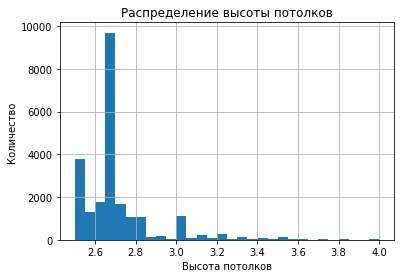

In [42]:
# посмотрим высоту потолков после обработки столбца
#data['ceiling_height'].hist(bins=30)
fig, ax = plt.subplots()
ax.hist(data['ceiling_height'], bins=30)
ax.set_xlabel('Высота потолков')
ax.set_ylabel('Количество')
ax.grid(True)
ax.set_title('Распределение высоты потолков')
data['ceiling_height'].describe()

Здесь явно повлияло на гистограмму то, что пропуски были заполнены медианными значениями. Однако даже без этого большинство квартир имело высоту потолков ниже 2.9 метра и выше 2.5.

Рассмотрим тип этажа квартиры

count      23070
unique         3
top       другие
freq       17007
Name: floor_type, dtype: object

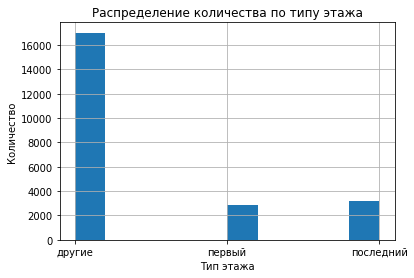

In [43]:
# тип этажа квартиры
#data['floor_type'].hist()
fig, ax = plt.subplots()
ax.hist(data['floor_type'])
ax.set_xlabel('Тип этажа')
ax.set_ylabel('Количество')
ax.grid(True)
ax.set_title('Распределение количества по типу этажа')
data['floor_type'].describe()

Вполне логично, что большинство квартир имеют тип другие, однако очень много и других типов, если учесть, что разброс в типе "другие" может составлять до 30 этажей

Рассмотрим общее число этажей

count    23070.000000
mean        10.746164
std          6.613286
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

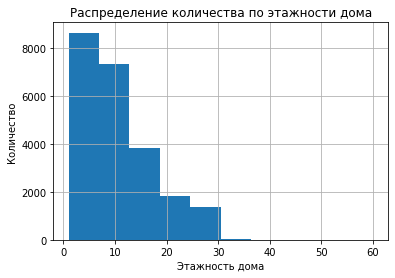

In [44]:
# общее число этажей
#data['floors_total'].hist()
fig, ax = plt.subplots()
ax.hist(data['floors_total'])
ax.set_xlabel('Этажность дома')
ax.set_ylabel('Количество')
ax.grid(True)
ax.set_title('Распределение количества по этажности дома')
data['floors_total'].describe()

Посмотрим сколько каких значений более детально

In [45]:
data['floors_total'].value_counts(sort =True, ascending = True)

29       1
33       1
60       1
34       1
52       1
36       3
28      21
1       23
35      24
26     123
21     158
27     164
11     198
13     227
20     268
22     284
19     331
8      345
23     348
15     363
2      369
24     460
18     498
14     548
7      554
3      636
17     825
6      840
25    1073
4     1149
10    1164
12    1344
16    1363
9     3724
5     5638
Name: floors_total, dtype: int64

Из полученных данных можно провести границу в 27 этажей для типичных домов

count    23017.000000
mean        10.695138
std          6.528911
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         27.000000
Name: floors_total, dtype: float64

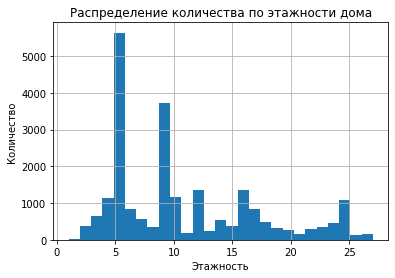

In [46]:
data = data.query('floors_total <= 27')
#data['floors_total'].hist(bins = 27)
fig, ax = plt.subplots()
ax.hist(data['floors_total'], bins=27)
ax.set_xlabel('Этажность')
ax.set_ylabel('Количество')
ax.grid(True)
ax.set_title('Распределение количества по этажности дома')
data['floors_total'].describe()

На графике есть несколько пиков, они соответствуют типовым домам, 5-этажкам, 9-этажкам, 12, 16 и 25 этажкам

Рассмотрим расстояние до центра

count    17590.000000
mean     14333.313417
std       8593.411219
min        181.000000
25%       9550.250000
50%      13180.500000
75%      16315.750000
max      65968.000000
Name: city_centers_nearest, dtype: float64

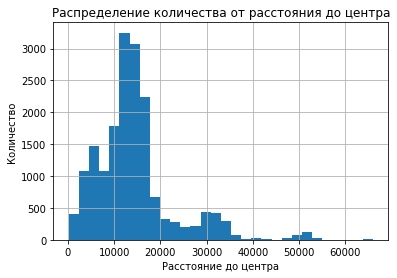

In [47]:
# расстояние до центра в метрах
#data['city_centers_nearest'].hist(bins=30)
fig, ax = plt.subplots()
ax.hist(data['city_centers_nearest'], bins=30)
ax.set_xlabel('Расстояние до центра')
ax.set_ylabel('Количество')
ax.grid(True)
ax.set_title('Распределение количества от расстояния до центра')
data['city_centers_nearest'].describe()

In [48]:
#  Интереса ради глянем что там за локальный максимум в 60+ км
data_more_60km = data.query('city_centers_nearest_km > 60')
print(data_more_60km['city_centers_nearest_km'].value_counts())
print(len(data_more_60km))
print(data_more_60km['locality_name'])

66.0    3
65.0    2
61.0    1
63.0    1
62.0    1
Name: city_centers_nearest_km, dtype: int64
8
574      поселок Молодежное
2961            Зеленогорск
5191     поселок Молодежное
5313     поселок Молодежное
9594     поселок Молодежное
16476             Ломоносов
18780           Зеленогорск
20629    поселок Молодежное
Name: locality_name, dtype: object


Скорее всего большинство квартир за 30 км указывают не на тот центр города, в котором они находятся, а на Санкт-Петербург. 

(P.s. можно заменить на медианные значения этих населенных пунктов, но не уверен, что это хорошая идея)

В целом большинство квартир продается в радиусе 15 км, скорее всего это спальные районы Петербурга, в которых наибольшее число квартир

Теперь расстояние до ближайшего парка

count    7733.000000
mean      493.199276
std       343.608942
min         1.000000
25%       288.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

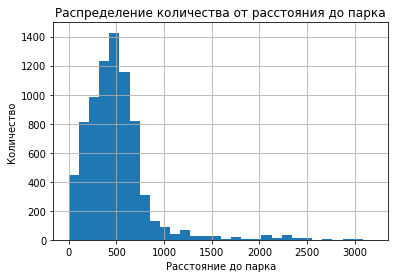

In [49]:
# расстояние до ближайшего парка
#data['parks_nearest'].hist(bins=30, figsize=(8, 6))
fig, ax = plt.subplots()
ax.hist(data['parks_nearest'], bins=30)
ax.set_xlabel('Расстояние до парка')
ax.set_ylabel('Количество')
ax.grid(True)
ax.set_title('Распределение количества от расстояния до парка')
data['parks_nearest'].describe()

Большинство квартир в пешей доступности от парков (600 метров), график имеет нормальный пуассоновский вид 

#### Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
- Постройте гистограмму.
- Посчитайте среднее и медиану.

В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

count    19954.000000
mean       179.244011
std        218.150736
min          1.000000
25%         45.000000
50%         95.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

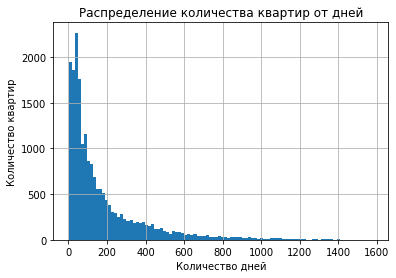

In [50]:
# создадим отдельный дф, где квартиры уже проданы наверняка (т.е. нет выбросов)
data_sold = data.copy()
data_sold = data_sold.dropna(subset=['days_exposition']).reset_index(drop=True)
#data_sold['days_exposition'].hist(bins=100)
fig, ax = plt.subplots()
ax.hist(data['days_exposition'], bins=100)
ax.set_xlabel('Количество дней')
ax.set_ylabel('Количество квартир')
ax.grid(True)
ax.set_title('Распределение количества квартир от дней')
data_sold['days_exposition'].describe()

Медианное значение 95 дней, а среднее 179, т.е. почти в 2 раза отличается. При этом есть значения больше 1000 дней, т.е. более 3 лет люди продавали квартиру, что звучит крайне странно, возможно люди забывали снять объявление. Рассмотрим более детально данные до 3 квартиля (229 дней)

Text(0.5, 1.0, 'Распределение количества квартир от дней')

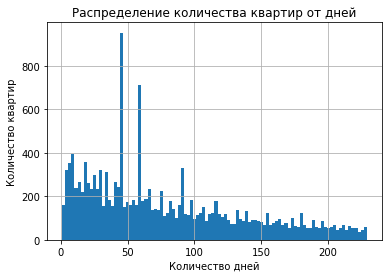

In [51]:
#data_sold['days_exposition'].hist(bins=100, range=(1, 229))
#data_sold['days_exposition'].describe()
fig, ax = plt.subplots()
ax.hist(data['days_exposition'], bins=100, range=(1, 229))
ax.set_xlabel('Количество дней')
ax.set_ylabel('Количество квартир')
ax.grid(True)
ax.set_title('Распределение количества квартир от дней')

In [52]:
data_sold['days_exposition'].value_counts()

45.0      864
60.0      537
7.0       229
30.0      204
90.0      184
         ... 
1148.0      1
1345.0      1
994.0       1
671.0       1
1174.0      1
Name: days_exposition, Length: 1129, dtype: int64

В топе дней находятся кратные числа каким-либо временным промежутка (неделя, месяц...), значит либо люди использовали какие-то премиум-аккаунты, позволяющие вывести квартиры в топ, либо люди оплачивали работу риелторов на данные сроки, после чего квартиру снимали с продажи. Вполне возможно в датафрейме есть неявные дубликаты, отличающиеся только колонками с датами, но тогда есть вероятность, не зная точного адреса квартиры, удалить квартиры, не являющиеся одними и теми же. 
В целом динамика продаж такова, что чем дольше стоит квартира, тем меньше шансов ее продать и надо что-то делать с объявлением продавцу.
Дать характеристику быстрым продажам и долгим затруднительно, можно принять за критерии 1 и 3 квартили (45 и 228 дней соотвтественно)

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

Изучим зависимость цены от общей площади

0.7749756087109754

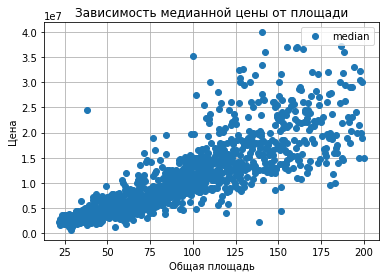

In [53]:
# создадим сводную таблицу с медианным значением, также посчитаем корреляцию
data_area = data.pivot_table(index='total_area', values='last_price', aggfunc=['median', 'mean', 'count'])
data_area.columns = ['median', 'mean', 'count']
data_area.plot(y='median', style='o', grid=True, title='Зависимость медианной цены от площади', 
               ylabel='Цена', xlabel='Общая площадь')
data['total_area'].corr(data['last_price'])

0.77 это сильный эффект корреляции, значит есть сильная зависимость цены квартиры от ее площади, чем больше площадь, тем больше и цена

Теперь посчитаем цену от жилой площади

0.6634226685319642

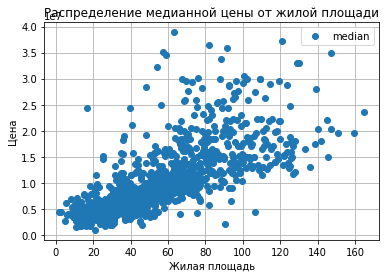

In [54]:
data_area = data.pivot_table(index='living_area', values='last_price', aggfunc=['median', 'mean', 'count'])
data_area.columns = ['median', 'mean', 'count']
data_area.plot(y='median', style='o', grid=True, title='Распределение медианной цены от жилой площади',
               ylabel='Цена', xlabel='Жилая площадь')
data['living_area'].corr(data['last_price'])

0.66 - тоже достаточно сильная зависимость, чем больше площадь, тем больше цена

Теперь зависимость от площади кухни

0.5896374536296166

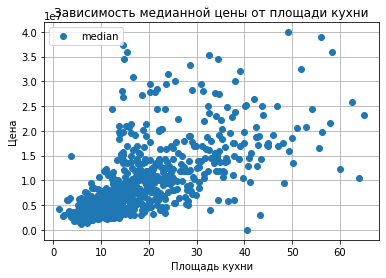

In [55]:
data_area = data.pivot_table(index='kitchen_area', values='last_price', aggfunc=['median', 'mean', 'count'])
data_area.columns = ['median', 'mean', 'count']
data_area.plot(y='median', style='o', grid=True, title='Зависимость медианной цены от площади кухни', 
               ylabel='Цена', xlabel='Площадь кухни')
data['kitchen_area'].corr(data['last_price'])

0.59 средняя зависимость. Такое уменьшение корреляции связано с тем, что у многих квартир с разным метражом примерно одинаковая площадь кухни

Исследуем зависимость цены от количества комнат

0.48286065354969915

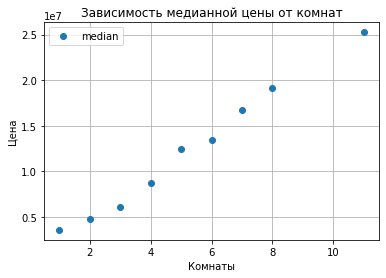

In [56]:
data_area = data.pivot_table(index='rooms', values='last_price', aggfunc=['median', 'mean', 'count'])
data_area.columns = ['median', 'mean', 'count']
data_area.plot(y='median', style='o', grid=True, title='Зависимость медианной цены от комнат', ylabel='Цена', xlabel='Комнаты')
data['rooms'].corr(data['last_price'])

Зависимость от количества комнат тоже есть, однако она слабее, чем с площадями. Скорее это уже не самый важный фактор при формировании цены

Зависимость цены от типа этажа

<AxesSubplot:title={'center':'last_price'}, xlabel='floor_type'>

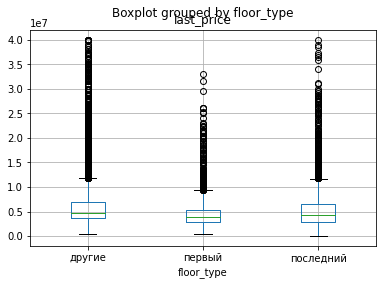

In [57]:
data.boxplot('last_price', by = 'floor_type')

В целом отличие небольшое, но оно есть. Первые этажи самые дешевые, у них есть различные проблемы, затем идут последние этажи, там тоже есть нюансы с жильем, затем другие этажи, но разница с первым этажом  у последних и других гораздо сильнее, чем между собой

Исследуем зависимость от дня недели выставления объявления

-0.012462764275336661

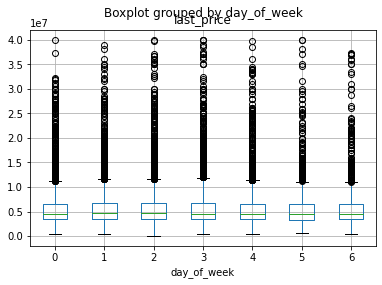

In [58]:
data.boxplot('last_price', by = 'day_of_week')
data['last_price'].corr(data['day_of_week'])

Связи между днями недели размещения нет никакой

Исследуем от номера месяца

0.005655816997139677

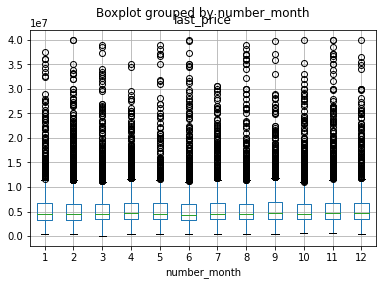

In [59]:
data.boxplot('last_price', by = 'number_month')
data['last_price'].corr(data['number_month'])

Связи между месяцами нет

-0.033737798939307326

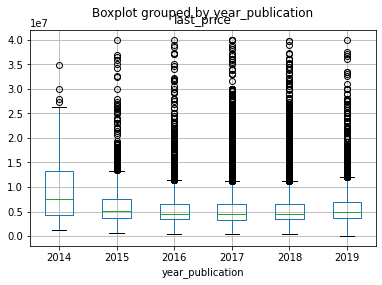

In [60]:
data.boxplot('last_price', by = 'year_publication')
data['last_price'].corr(data['year_publication'])

<AxesSubplot:title={'center':'Зависимость медианной цены от года продажи'}, xlabel='Год публикации', ylabel='Цена'>

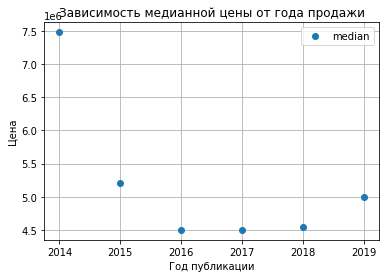

In [61]:
data_area = data.pivot_table(index='year_publication', values='last_price', aggfunc=['median', 'mean', 'count'])
data_area.columns = ['median', 'mean', 'count']
data_area.plot(y='median', style='o', grid=True, title='Зависимость медианной цены от года продажи', 
               ylabel='Цена', xlabel='Год публикации')

In [62]:
data_area

,median,mean,count
year_publication,,,
2014,7476560.0,9.712204e+06,129
2015,5200000.0,6.724793e+06,1111
2016,4500000.0,5.794758e+06,2674
2017,4500000.0,5.694727e+06,7971
2018,4550000.0,5.602690e+06,8322
2019,5000000.0,6.102086e+06,2810


В 2014 году квартиры стоили сильно дороже, чем в последующие года. В остальные годы стоимость примерно одинаковая

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [63]:
# получим список городов с наибольшим числом объявлений
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15204
поселок Мурино         539
поселок Шушары         438
Всеволожск             394
Пушкин                 359
Колпино                336
поселок Парголово      319
Гатчина                307
деревня Кудрово        298
Выборг                 234
Name: locality_name, dtype: int64

In [64]:
# отфильтруем датафрейм по полученному списку
cities=['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', \
        'поселок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']
data_filtered = data.query('locality_name in @cities')

In [65]:
# построим сводную таблицу
data_pivot = data_filtered.pivot_table(index='locality_name', values='price_square', aggfunc=['median', 'mean', 'count'])
data_pivot.columns = ['median', 'mean', 'count']
print(data_pivot.sort_values(by='mean', ascending=False))

                       median           mean  count
locality_name                                      
Санкт-Петербург    104385.960  111553.886678  15204
Пушкин              99744.250  103029.987326    359
деревня Кудрово     91930.235   92481.848054    298
поселок Парголово   91642.860   90314.528213    319
поселок Мурино      85680.500   85527.079258    539
поселок Шушары      76747.970   78529.235183    438
Колпино             74723.745   75352.475595    336
Гатчина             67796.610   68746.146515    307
Всеволожск          65789.470   68671.479086    394
Выборг              58233.005   58190.128162    234


Здесь были подсчитаны средние цены для 10 наиболее популярных городов, в итоге получили, что самая большая цена за квадрат в Санкт-Петербурге, а самая маленькая в Выборге. Связано это с тем, что в крупном городе с хорошей инфраструктурой людям приятнее жить и поэтому цена растет, Выборг, скорее всего, наименее развитый среди остальных, т.к. даже по количеству объявлений можно понять, что он маленький город по сравнению с другими населеными пунктами

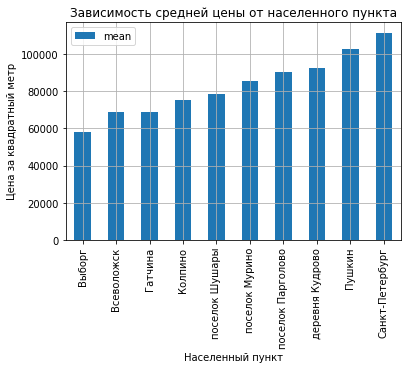

In [67]:
data_pivot.sort_values('mean').plot(kind='bar', y='mean', grid=True, title='Зависимость средней цены от населенного пункта', 
               ylabel='Цена за квадратный метр', xlabel='Населенный пункт');

#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

In [68]:
# выделим нужные строки
data_peter = data.query('locality_name == "Санкт-Петербург"')
data_price_km = data_peter.pivot_table(index = 'city_centers_nearest_km', values='last_price', aggfunc='mean')
data_price_km

,last_price
city_centers_nearest_km,
0.0,1.715875e+07
1.0,1.238366e+07
2.0,1.124075e+07
3.0,9.921872e+06
4.0,1.066921e+07
5.0,1.109423e+07
6.0,1.023569e+07
7.0,1.058150e+07
8.0,8.875222e+06


-0.343750637217416

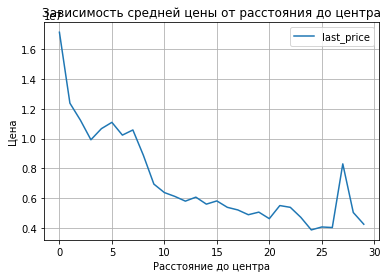

In [69]:
# построим график
data_price_km.plot(grid=True, title='Зависимость средней цены от расстояния до центра', 
               ylabel='Цена', xlabel='Расстояние до центра')
data['city_centers_nearest_km'].corr(data['last_price'])

Видно, что цена с расстоянием падает достаточно резко, хотя в районе 27 км есть резкий подъем, скорее всего это объявления в другом крупном пригороде, но почему-то поставили Санкт-Петербург

### Общий вывод

В данном исследовании были рассмотрены все изначально поставленные задачи:
- была изучена БД
- были сгруппированы квартиры по различным группам, типичная квартира представляет собой 2-комнатную квартиру в девятиэтажке, с площадью 52 квадратных метра, жилой 30 и кухней 7, потолками высотой 2.65 м, стоит около 4.6 млн рублей, в 5-минутной доступности от парка 13 км от центра города
- были изучены времена снятий объявлений, очень много людей покупали премиум-аккаунты для продвижения квартир, однако это не увенчалось успехом, после окончания таких аккаунтов люди просто снимали объявления (предположение)
- также была получена зависимость, что чем дольше квартира стоит в продаже, тем меньше у нее шансов на продажу
- на цену квартиры сильнее всего влияет общая площадь, а также жилая площадь; также квартиры на 1 этаже имеют более низкую цену в сравнении с другими этажами, связано это с различным дискомфортом обитания там
- также цены на квартиры упали в сравнении с 2014 годом (в 2014 стоило 7.5 млн, в 2016 4.5 млн)
- Самым дорогим из крупных городов оказался Санкт-Петербург (111537 руб/м2), самым дешевым Выборг (58190 руб/м2)
- также получено, что есть зависимость от расстояния до центра Петербурга, чем дальше центр, тем дешевле квартира